In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, './code')

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm

from correlations import generate_correlation_matrix, is_pos_def
from model import generate_random_returns, generate_random_symbols, get_cholesky
from plot import plot_corr, plot_corr_cluster, plot_corr_multiple

In [4]:
plt.style.use('ggplot')

In [5]:

# Magnitude bands for general entries
RHO_LOW  = 0.3
RHO_HIGH = 0.5

# Deviation from the zero mean for correlations
RHO_SIGMA = 1.5

def generate_parameters():
    # Pack in dictionary to use in correlation matrix generator
    params = dict()
    params['rho_low']   = RHO_LOW
    params['rho_high']  = RHO_HIGH
    params['rho_sigma'] = RHO_SIGMA
    
    return params

params = generate_parameters()

## Random indepedent variables

In [57]:
prices_df = pd.read_csv('prices_benchmarks.csv', index_col= 'Date', parse_dates=True)
prices_df = prices_df.asfreq('B')

Text(0, 0.5, '100-base price')

d:\envs\degiro\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  if __name__ == '__main__':


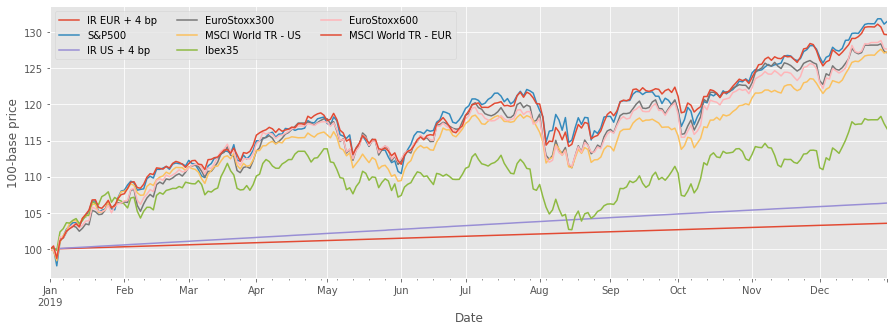

In [58]:
ax = prices_df.plot(figsize = (15,5))

ax.legend(ncol = 3)
ax.set_ylabel('100-base price')

plt.savefig('prices.png', dpi=300, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=True, bbox_inches='tight', pad_inches=0.1,
          frameon=None, metadata=None)

In [59]:
corr_target_df = pd.read_csv("corr_benchmarks.csv", index_col="SymbolId")
corr_target_df.index.name = None

d:\envs\degiro\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  """


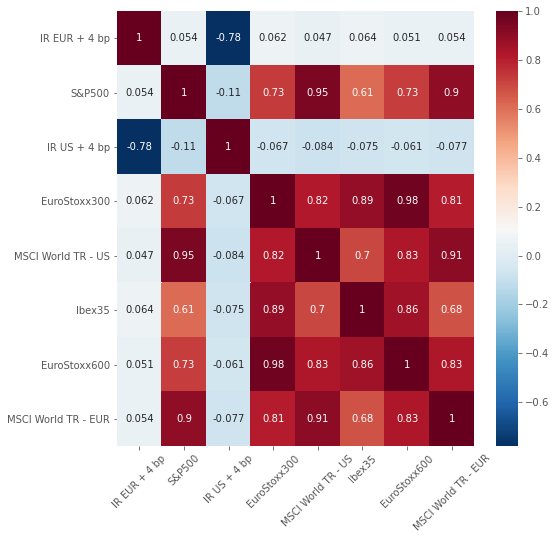

In [60]:
plot_corr(corr_target_df, my_cmap="RdBu_r")
plt.savefig('corr_target.png', dpi=300, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=True, bbox_inches='tight', pad_inches=0.1,
          frameon=None, metadata=None)

In [94]:
N_DAYS = 260

n_sids = len(prices_df.columns)

symbol_ids = generate_random_symbols(n_sids = n_sids)

mu_returns = 0.0
sigma_returns = 1e-2

normal_df = generate_random_returns(n_days=N_DAYS, symbol_ids=symbol_ids,
                                     mu = mu_returns, sigma=sigma_returns)

L = get_cholesky(corr_target_df)

L_projection = np.dot(L, normal_df.T).T

returns_df = pd.DataFrame(data = L_projection, 
                          index = normal_df.index, columns=symbol_ids)

d:\envs\degiro\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  import sys


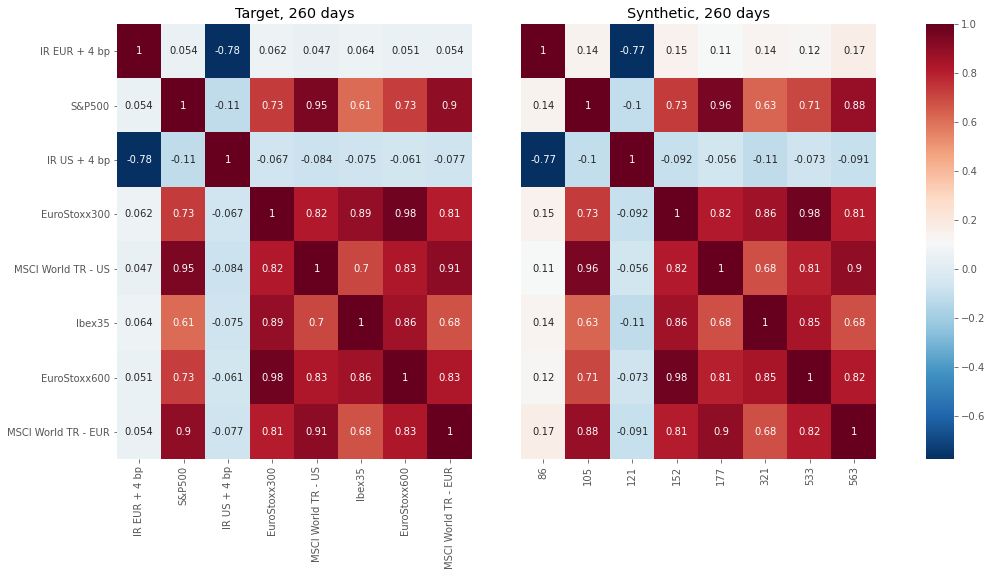

In [97]:
plot_corr_multiple(corr1=corr_target_df, corr2=returns_df.corr(), 
                   titles = ['Target, 260 days', f'Synthetic, {N_DAYS} days'],
                   my_cmap="RdBu_r")
plt.savefig('comparison_target_vs_synthetic.png', dpi=300, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=True, bbox_inches='tight', pad_inches=0.1,
          frameon=None, metadata=None)

---

# Random correlations matrices

In [102]:
N_MATRICES = 1000

eigenvalues = []

for _ in tqdm(range(N_MATRICES)):

    _corr_df = generate_correlation_matrix(symbol_ids=symbol_ids, params=params)
    
    _eigenvals = np.linalg.eigvals(_corr_df)

    eigenvalues.append(_eigenvals)

100%|██████████| 1000/1000 [00:16<00:00, 60.30it/s]


Text(0.5, 1.0, 'Spectrum of 1000 random candidate matrices')

Text(0.5, 0, '$\\lambda$')

d:\envs\degiro\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  from ipykernel import kernelapp as app


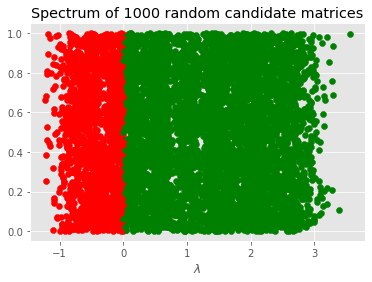

In [103]:
for eigs in eigenvalues:
    
    mask_positive = eigs > 0
    
    _rand = np.random.rand(1)
    
    plt.scatter(eigs[mask_positive], _rand * np.ones_like(eigs[mask_positive]), c = 'g');
    plt.scatter(eigs[~mask_positive], _rand * np.ones_like(eigs[~mask_positive]), c = 'r');

plt.title(f'Spectrum of {N_MATRICES} random candidate matrices')
plt.xlabel('$\\lambda$')
plt.savefig('spectrum.png', dpi=300, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=True, bbox_inches='tight', pad_inches=0.1,
          frameon=None, metadata=None)